In [1]:
# Importation des librairies et des données 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import time

In [2]:
# Decimal = ',' hyper important pour que python comprenne les nombres
data = pd.read_csv('/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv', delimiter=';', decimal=',', encoding = "ISO-8859-1")
display(data)

,IDENT_IND,IDENT_MEN,MVEH,POND_JOUR,MOTPREC,MMOTIFDES,MSTATION,Motif,Stationnement,Lieu_Depart,...,MVEHEXT,INSTANT_DEPART,INSTANT_ARRIVEE,DISTANCE,KVAQUIV,TRAVAILLE,Segment_detail,IDENT_V,Segment,num_dep_V
0,110000011400001,1100000114000,1,9891.108772,1.1,2.1,5,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-03 14:15:00,2029-01-03 14:20:00,2.200000,1.0,2,Particulier,110000011400001_1_Particulier,Particulier,1
1,110000011400001,1100000114000,1,9891.108772,2.1,1.1,4,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,...,NaN,2029-01-03 14:45:00,2029-01-03 14:50:00,2.200000,1.0,2,Particulier,110000011400001_1_Particulier,Particulier,2
2,110000011500001,1100000115000,2,5275.295948,1.1,1.4,6,"Étudier (école, lycée, université)",Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-05 07:45:00,2029-01-05 08:45:00,28.000000,1.0,2,Particulier,110000011500001_2_Particulier,Particulier,1
3,110000011500001,1100000115000,2,5275.295948,1.4,1.1,4,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,...,NaN,2029-01-05 10:30:00,2029-01-05 11:00:00,28.000000,1.0,2,Particulier,110000011500001_2_Particulier,Particulier,2
4,110000013500002,1100000135000,1,24058.724023,1.1,9.1,4,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Domicile,...,NaN,2029-01-03 15:00:00,2029-01-03 15:15:00,5.321410,1.0,1,Particulier,110000013500002_1_Particulier,Particulier,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22521,940000044100001,9400000441000,1,15761.857518,3.1,2.1,5,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Rue,...,NaN,2029-01-03 10:30:00,2029-01-03 10:35:00,1.000000,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,2
22522,940000044100001,9400000441000,1,15761.857518,2.1,4.1,3,"Démarche administrative, recherche d'informations","Stationnement sur la voie publique, payant",Parking,...,NaN,2029-01-03 11:30:00,2029-01-03 11:35:00,1.000000,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,3
22523,940000044100001,9400000441000,1,15761.857518,4.1,1.1,1,Retour au domicile,"Stationnement sur la voie publique, gratuit sa...",Rue,...,NaN,2029-01-03 12:00:00,2029-01-03 13:00:00,36.476190,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,4
22524,940000052100001,9400000521000,2,14068.334434,1.1,9.1,4,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Rue,...,NaN,2029-01-03 06:00:00,2029-01-03 06:45:00,21.661727,1.0,1,Particulier,940000052100001_2_Particulier,Particulier,1


On filtre le tableau pour ne garder que les premiers départs

In [3]:
premiers_departs = data[data.num_dep_V == 1]

In [4]:
premiers_departs

,IDENT_IND,IDENT_MEN,MVEH,POND_JOUR,MOTPREC,MMOTIFDES,MSTATION,Motif,Stationnement,Lieu_Depart,...,MVEHEXT,INSTANT_DEPART,INSTANT_ARRIVEE,DISTANCE,KVAQUIV,TRAVAILLE,Segment_detail,IDENT_V,Segment,num_dep_V
0,110000011400001,1100000114000,1,9891.108772,1.1,2.1,5,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-03 14:15:00,2029-01-03 14:20:00,2.200000,1.0,2,Particulier,110000011400001_1_Particulier,Particulier,1
2,110000011500001,1100000115000,2,5275.295948,1.1,1.4,6,"Étudier (école, lycée, université)",Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-05 07:45:00,2029-01-05 08:45:00,28.000000,1.0,2,Particulier,110000011500001_2_Particulier,Particulier,1
4,110000013500002,1100000135000,1,24058.724023,1.1,9.1,4,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Domicile,...,NaN,2029-01-03 15:00:00,2029-01-03 15:15:00,5.321410,1.0,1,Particulier,110000013500002_1_Particulier,Particulier,1
6,110000013600001,1100000136000,1,20658.322154,1.1,9.1,1,Travailler dans son lieu fixe et habituel,"Stationnement sur la voie publique, gratuit sa...",Rue,...,NaN,2029-01-02 07:15:00,2029-01-02 08:15:00,25.232499,1.0,1,Particulier,110000013600001_1_Particulier,Particulier,1
8,110000014400001,1100000144000,2,31828.347792,1.1,2.1,1,Se rendre dans une grande surface ou un centre...,"Stationnement sur la voie publique, gratuit sa...",Rue,...,NaN,2029-01-06 08:30:00,2029-01-06 08:40:00,3.000000,1.0,1,Particulier,110000014400001_2_Particulier,Particulier,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22514,940000036400001,9400000364000,1,42481.676290,1.1,9.1,4,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Rue,...,NaN,2029-01-06 05:15:00,2029-01-06 05:45:00,35.000000,1.0,1,Particulier,940000036400001_1_Particulier,Particulier,1
22516,940000041500002,9400000415000,1,17037.898067,1.1,2.1,5,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-03 14:00:00,2029-01-03 14:15:00,5.000000,1.0,2,Particulier,940000041500002_1_Particulier,Particulier,1
22518,940000041500002,9400000415000,2,17037.898067,1.1,2.2,5,"Se rendre dans un centre de proximité, petit c...",Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-03 10:00:00,2029-01-03 10:30:00,25.000000,1.0,2,Particulier,940000041500002_2_Particulier,Particulier,1
22520,940000044100001,9400000441000,1,15761.857518,1.1,3.1,3,"Soins médicaux ou personnels (médecin, coiffeur.)","Stationnement sur la voie publique, payant",Rue,...,NaN,2029-01-03 08:00:00,2029-01-03 09:00:00,36.666667,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,1


Un premier aperçu de ces données pondérées :

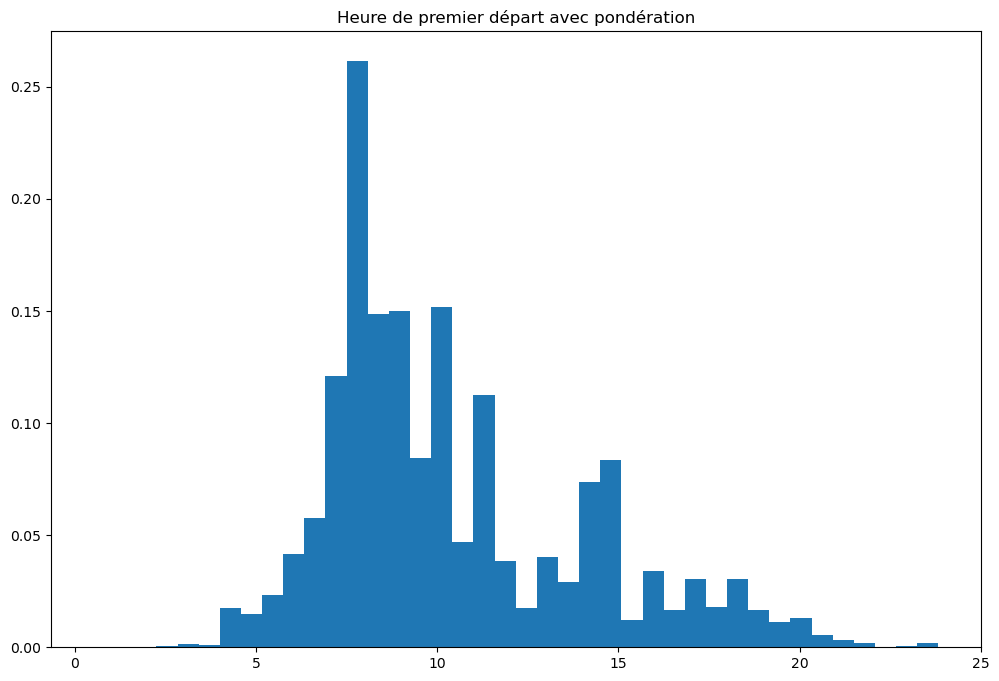

In [5]:
plt.figure(figsize=(12,8))
plt.hist(premiers_departs.HEURE_DEPART, bins=40, density=True, weights=premiers_departs.POND_JOUR)
plt.title("Heure de premier départ avec pondération")
plt.show()

### Programme essayant de trouver la meilleure loi de modélisation :

##### 1. Sur une journée quelconque :

In [6]:
y, x = np.histogram(premiers_departs.HEURE_DEPART, bins=40, density=True, weights=premiers_departs.POND_JOUR)
x = (x + np.roll(x, -1))[:-1] / 2.0

/opt/mamba/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


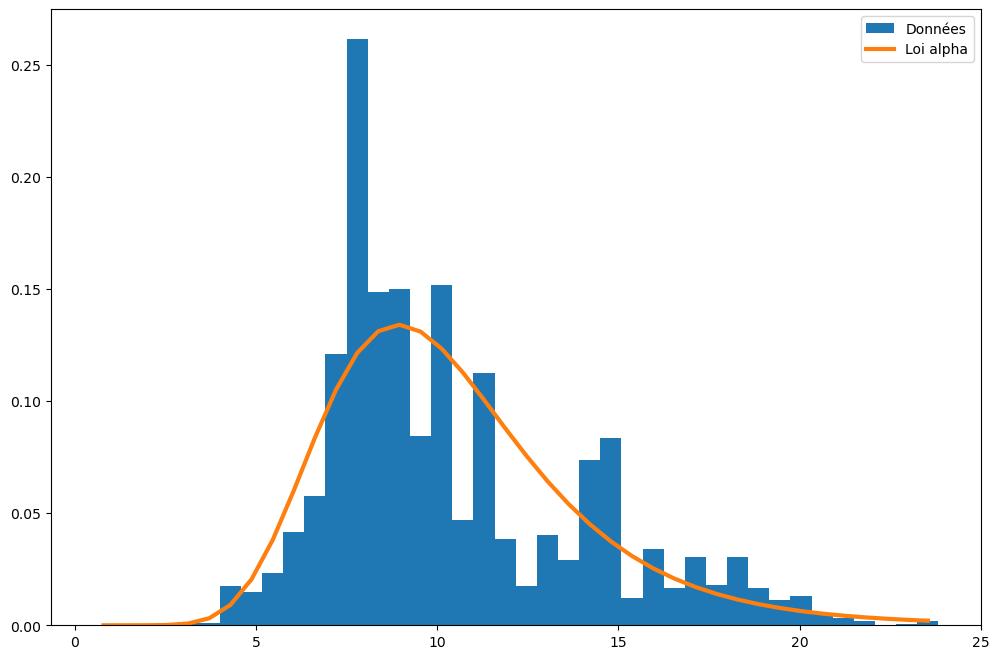

Selected Model :  alpha
Loc. param. :  -7.957422571804653
Scale param. :  101.2918058825972
Other arguments :  (5.665311921454677,)
SSE :  0.04035105210903607


In [7]:
dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(premiers_departs.HEURE_DEPART)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(premiers_departs.HEURE_DEPART, bins=40, density=True, label="Données", weights=premiers_departs.POND_JOUR)
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# Deuxième étape :
Modéliser plus de lois pour être plus précis en fonction de 4 plages horaires.

In [8]:
display(premiers_departs)

,IDENT_IND,IDENT_MEN,MVEH,POND_JOUR,MOTPREC,MMOTIFDES,MSTATION,Motif,Stationnement,Lieu_Depart,...,MVEHEXT,INSTANT_DEPART,INSTANT_ARRIVEE,DISTANCE,KVAQUIV,TRAVAILLE,Segment_detail,IDENT_V,Segment,num_dep_V
0,110000011400001,1100000114000,1,9891.108772,1.1,2.1,5,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-03 14:15:00,2029-01-03 14:20:00,2.200000,1.0,2,Particulier,110000011400001_1_Particulier,Particulier,1
2,110000011500001,1100000115000,2,5275.295948,1.1,1.4,6,"Étudier (école, lycée, université)",Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-05 07:45:00,2029-01-05 08:45:00,28.000000,1.0,2,Particulier,110000011500001_2_Particulier,Particulier,1
4,110000013500002,1100000135000,1,24058.724023,1.1,9.1,4,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Domicile,...,NaN,2029-01-03 15:00:00,2029-01-03 15:15:00,5.321410,1.0,1,Particulier,110000013500002_1_Particulier,Particulier,1
6,110000013600001,1100000136000,1,20658.322154,1.1,9.1,1,Travailler dans son lieu fixe et habituel,"Stationnement sur la voie publique, gratuit sa...",Rue,...,NaN,2029-01-02 07:15:00,2029-01-02 08:15:00,25.232499,1.0,1,Particulier,110000013600001_1_Particulier,Particulier,1
8,110000014400001,1100000144000,2,31828.347792,1.1,2.1,1,Se rendre dans une grande surface ou un centre...,"Stationnement sur la voie publique, gratuit sa...",Rue,...,NaN,2029-01-06 08:30:00,2029-01-06 08:40:00,3.000000,1.0,1,Particulier,110000014400001_2_Particulier,Particulier,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22514,940000036400001,9400000364000,1,42481.676290,1.1,9.1,4,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Rue,...,NaN,2029-01-06 05:15:00,2029-01-06 05:45:00,35.000000,1.0,1,Particulier,940000036400001_1_Particulier,Particulier,1
22516,940000041500002,9400000415000,1,17037.898067,1.1,2.1,5,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-03 14:00:00,2029-01-03 14:15:00,5.000000,1.0,2,Particulier,940000041500002_1_Particulier,Particulier,1
22518,940000041500002,9400000415000,2,17037.898067,1.1,2.2,5,"Se rendre dans un centre de proximité, petit c...",Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-03 10:00:00,2029-01-03 10:30:00,25.000000,1.0,2,Particulier,940000041500002_2_Particulier,Particulier,1
22520,940000044100001,9400000441000,1,15761.857518,1.1,3.1,3,"Soins médicaux ou personnels (médecin, coiffeur.)","Stationnement sur la voie publique, payant",Rue,...,NaN,2029-01-03 08:00:00,2029-01-03 09:00:00,36.666667,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,1


In [9]:
prem_dep_0_11 = premiers_departs[premiers_departs.HEURE_DEPART <= 11]
prem_dep_11_14 = premiers_departs[premiers_departs.HEURE_DEPART.between(11,14)]
prem_dep_14_17 = premiers_departs[premiers_departs.HEURE_DEPART.between(14,17)]
prem_dep_17_0 = premiers_departs[17< premiers_departs.HEURE_DEPART]

# 0H-11H :

/opt/mamba/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


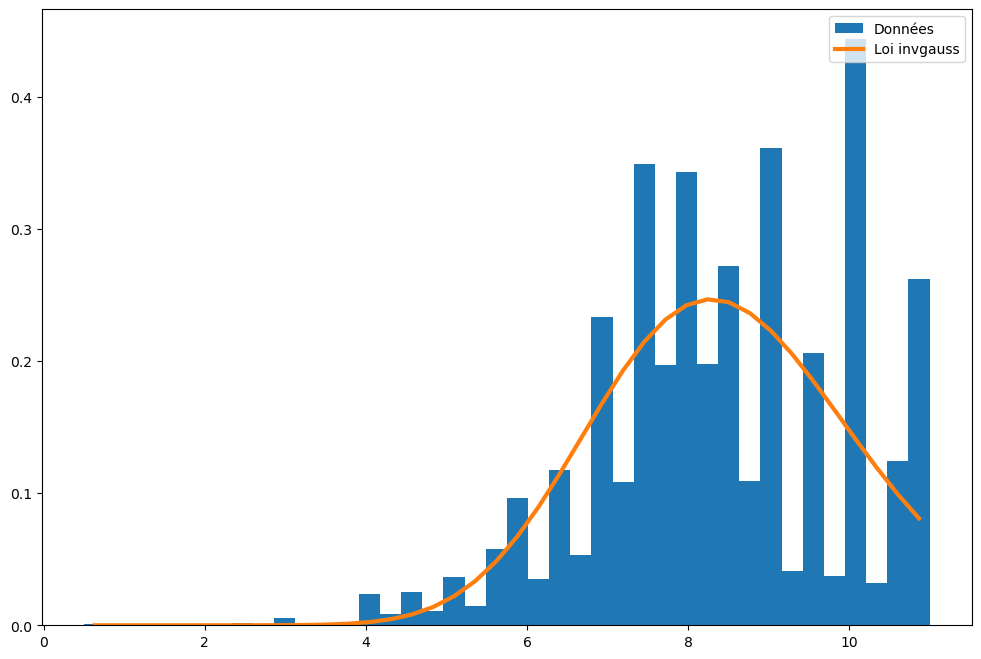

Selected Model :  invgauss
Loc. param. :  -8.816018140980376
Scale param. :  1953.8077359890804
Other arguments :  (0.008871076821660894,)
SSE :  0.26885832956426337


In [10]:
y, x = np.histogram(prem_dep_0_11.HEURE_DEPART, bins=40, density=True, weights=prem_dep_0_11.POND_JOUR)
x = (x + np.roll(x, -1))[:-1] / 2.0

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_0_11.HEURE_DEPART)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_0_11.HEURE_DEPART, bins=40, density=True, label="Données", weights=prem_dep_0_11.POND_JOUR)
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# 11H-14H :

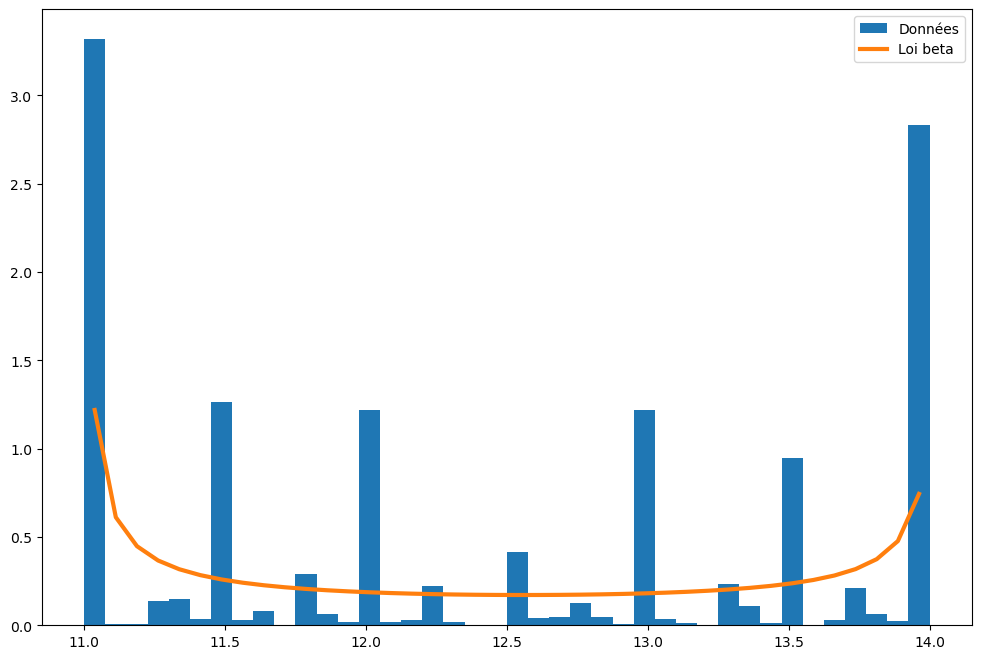

Selected Model :  beta
Loc. param. :  10.999999999999998
Scale param. :  3.0280217164625762
Other arguments :  (0.3584992892689531, 0.3956926817655244)
SSE :  14.186027948576143


In [11]:
y, x = np.histogram(prem_dep_11_14.HEURE_DEPART, bins=40, density=True, weights=prem_dep_11_14.POND_JOUR)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_11_14.HEURE_DEPART)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_11_14.HEURE_DEPART, bins=40, density=True, label="Données", weights=prem_dep_11_14.POND_JOUR)
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

**Note : 73,3% des premiers départs ont lieu le matin.**

# 14H-17H

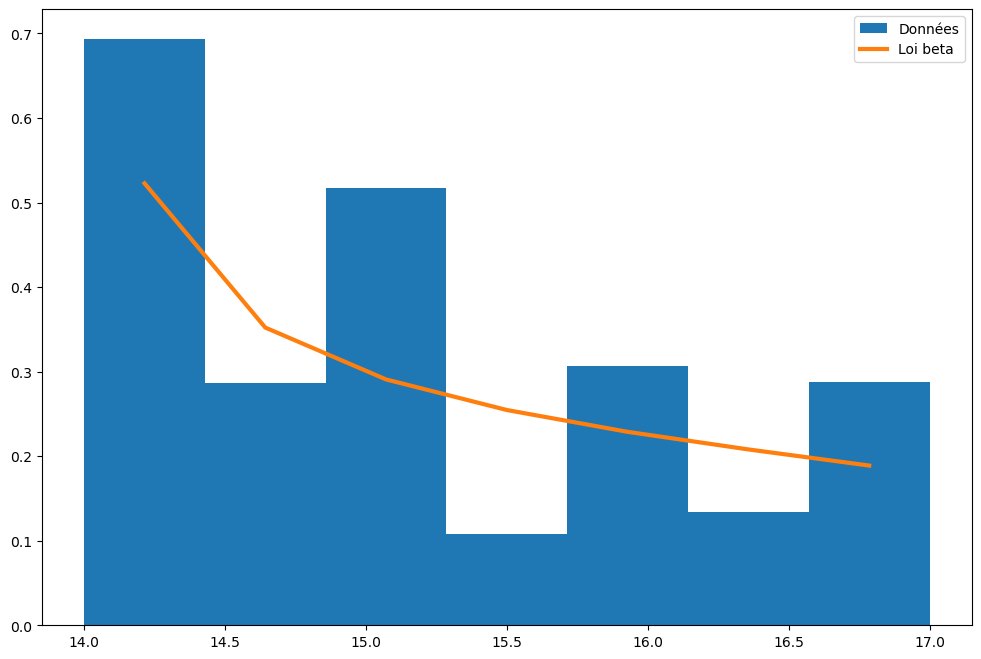

Selected Model :  beta
Loc. param. :  13.999999999999998
Scale param. :  3.4598192681601403
Other arguments :  (0.6502061532089027, 1.07682038637572)
SSE :  0.12803747577575963


In [12]:
y, x = np.histogram(prem_dep_14_17.HEURE_DEPART, bins=7, density=True, weights=prem_dep_14_17.POND_JOUR)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_14_17.HEURE_DEPART)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_14_17.HEURE_DEPART, bins=7, density=True, label="Données", weights = prem_dep_14_17.POND_JOUR)
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# 17H-00H

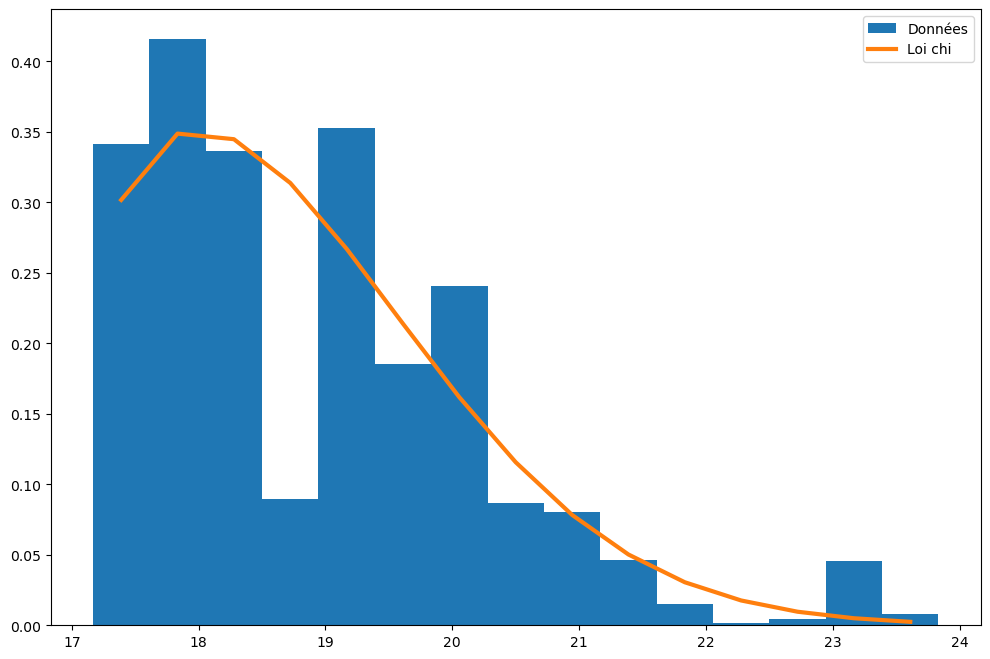

Selected Model :  chi
Loc. param. :  17.163028158929393
Scale param. :  1.957501846138864
Other arguments :  (1.1810322834418903,)
SSE :  0.0737456157938342


In [13]:
y, x = np.histogram(prem_dep_17_0.HEURE_DEPART, bins=15, density=True, weights=prem_dep_17_0.POND_JOUR)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_17_0.HEURE_DEPART)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_17_0.HEURE_DEPART, bins=15, density=True, label="Données", weights = prem_dep_17_0.POND_JOUR)
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

## Séparation semaine - week-end :

In [14]:
prem_dep_semaine = premiers_departs[premiers_departs.TYPE_jour.isin(['lundi','mardi','mercredi','jeudi','vendredi'])]
prem_dep_weekend = premiers_departs[premiers_departs.TYPE_jour.isin(['samedi','dimanche'])]

# Premier départ la semaine :

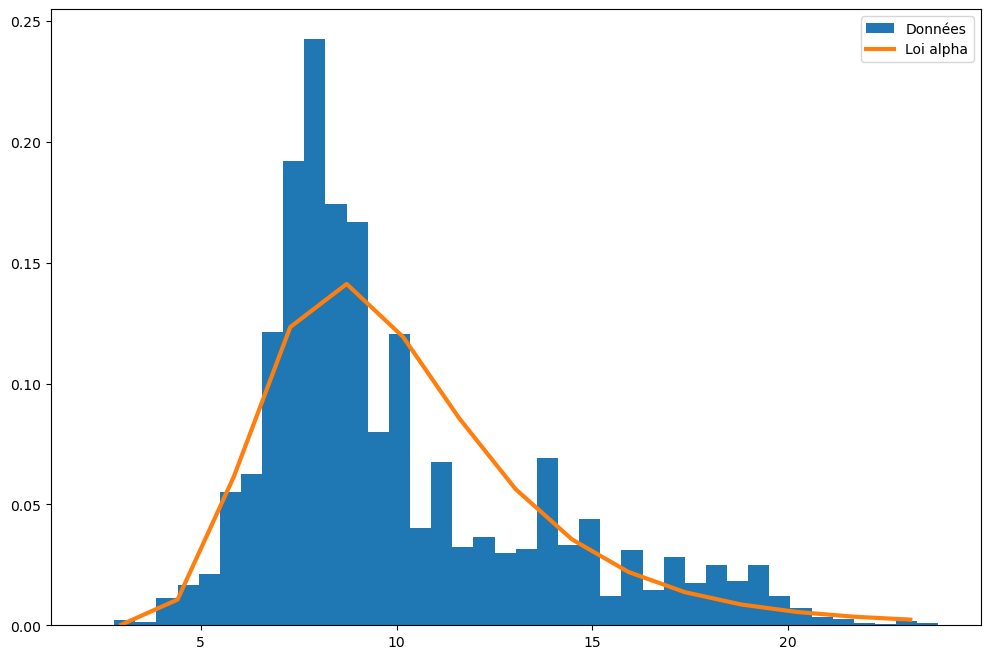

Selected Model :  alpha
Loc. param. :  -5.407531104874165
Scale param. :  73.82966635001947
Other arguments :  (4.929478244278435,)
SSE :  0.009994004140132528


In [15]:
y, x = np.histogram(prem_dep_semaine.HEURE_DEPART, bins=15, density=True, weights=prem_dep_semaine.POND_JOUR)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()


dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_semaine.HEURE_DEPART)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_semaine.HEURE_DEPART, bins=40, density=True, label="Données", weights=prem_dep_semaine.POND_JOUR)
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# Premier départ le week-end :

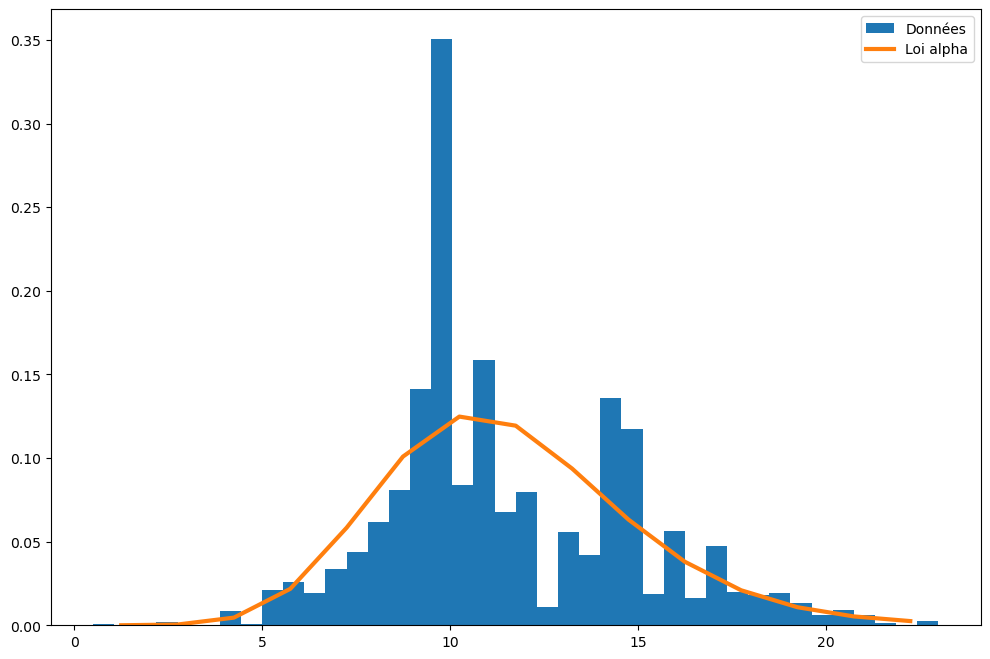

Selected Model :  alpha
Loc. param. :  -23.236545014469804
Scale param. :  370.08901835813776
Other arguments :  (10.723959657069173,)
SSE :  0.006662813830224659


In [16]:
y, x = np.histogram(prem_dep_weekend.HEURE_DEPART, bins=15, density=True, weights=prem_dep_weekend.POND_JOUR)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()


dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_weekend.HEURE_DEPART)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_weekend.HEURE_DEPART, bins=40, density=True, label="Données", weights=prem_dep_weekend.POND_JOUR)
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)